In [136]:
%%html
<style>
div.input {
    display:none;
}
</style>

Onsite Advertising Analysis

This is analysis of online advertising within our website.

The MCCVB has a website generating over 400,000 pageviews per month on average and boasting over 65% new users. The significant amount of traffic and impression potential generated from the site lead to a decision to partner with Destination Travel Network (DTN) to offer members the access to these impressions. 

In doing so the "media kit" was created in order to offer up a variety of packages and brand placement for the MCCVB site. This analysis is initially laying out the cost and revenue of the Onsite Advertising.

Then we are going to evaluate some research regarding current DMO practices and outcomes.

Lastly we are going to briefly summarize the current state, opportunity costs, and potential alternatives.




In [137]:
%matplotlib inline

In [138]:
import warnings
import os
import pandas as pd
import numpy as np
from ggplot import *


warnings.filterwarnings('ignore')

##############################################################
# Let's load the data

# All Invoicing data (2013-01-01 - 2015-01-01) DTN Destination Travel Network
data = pd.read_csv('onsite_ad_analysis/all_advertisers.csv')
# All bookingcom data (2015-01-01 - 2016-08-31) Bookings from our site
files = os.listdir('onsite_ad_analysis')
booking_files = [f for f in files if 'booking' in f]
booking_frames = []
for f in booking_files:
    directory = 'onsite_ad_analysis'
    path = os.path.join(directory, f) 
    temp = pd.read_csv(path)
    booking_frames.append(temp)

booking_data = pd.concat(booking_frames)

In [139]:
##############################################################
# Let's format the DTN data

data = data.rename(
        columns={
        "Desc" : "advertiser_name"
    })

# Format Dates
data['Date'] = pd.to_datetime(data['Date'])

# Clean Descriptions (member names)
data['advertiser_name'] = data['advertiser_name'].str.replace(' - Monterey','')

data['advertiser_name'] = data['advertiser_name'].str.replace(' - April','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - May','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - June','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - July','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - August','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - September','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - October','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - November','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - December','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - January','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - February','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - March','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -April','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -May','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -June','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -July','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -August','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -September','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -October','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -November','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -December','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -January','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -February','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -March','')

# Format new column for month-year. Readability
data['Month-Year'] = data['Date'].apply(lambda x: str(x.month) + "-" + str(x.year))
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year']  = data['Date'].apply(lambda x: x.year)

In [140]:
##############################################################
# Let's format the Booking data

#Rename Columns
booking_data = booking_data.rename(
        columns={
        "book nr." : "book_nr",
        "booked"  : "booked",
        "arrival" : "arrival",
        "departure" : "departure",
        "comission_eur" : "comission_eur",
        "perc" : "fee_eur",
        "total transaction value ( EUR )" : "total_trans_value_eur",
        "slip nr." : "slip_nr",
        "affiliate id" : "affiliate_id",
        "hotel name" : "hotel_name",
        "accomodation type" : "accomodation_type",
        "hotel city" : "hotel_city",
        "hotel ufi" : "hotel_ufi"
    })


#Subset Columns needed
booking_data_v2 = booking_data[['booked',
                                'arrival',
                                'departure',
                                'total_trans_value_eur',
                                'hotel_name',
                                'hotel_city',
                                'accomodation_type']]


booking_data_v2['booked'] = pd.to_datetime(booking_data_v2['booked'])
booking_data_v2['arrival'] = pd.to_datetime(booking_data_v2['arrival'])
booking_data_v2['departure'] = pd.to_datetime(booking_data_v2['departure'])

# booking_data_v2['hotel_name'].unique()
# data['advertiser_name'].unique()

In [141]:
##############################################################
# Let's transform the data for visualization & modeling


# Revenue Over time
revenue = data.groupby(['Date']).aggregate(sum)
revenue = revenue.reset_index()
revenue['Date'] = pd.to_datetime(revenue['Date'])
revenue['Month-Year'] = revenue['Date'].apply(lambda x: str(x.month) + "-" + str(x.year))
revenue['Month-Year'] = pd.to_datetime(revenue['Month-Year'])
revenue = revenue.sort(['Date'])


# Cumulative Revenue Over Time
revenue['Cumulative Sum'] = revenue['Amount'].cumsum()

# Unique Participants over Time
users = data.groupby(['Date','advertiser_name']).aggregate(len)
users = users.reset_index()
users_v2 = users.groupby(['Date']).aggregate(len)
users_v2 = users_v2.reset_index()
users_v2 = users_v2[['Date','Amount']]
users_v2 = users_v2.rename(columns={"Amount":"Unique Members"})
users_v2['Date'] = pd.to_datetime(users_v2['Date'])
users_v2['Month-Year'] = users_v2['Date'].apply(lambda x: str(x.month) + "-" + str(x.year))
users_v2['Month-Year'] = pd.to_datetime(users_v2['Month-Year'])

# Revenue and Participants over Time
full_u_r = pd.merge(users_v2, revenue, on = ['Month-Year'])
full_u_r['Cost-Per-Member'] = full_u_r['Amount']/full_u_r['Unique Members']



# Retention Rates, Who stayed and who bailed



# Loyalty - Avg Contract Lengths



# Top Spenders for each of the last several years
top_revenue = data.groupby(['Year','advertiser_name']).aggregate(sum)
top_revenue = top_revenue.reset_index()
top_revenue = top_revenue.sort(['Year','Amount'], ascending = False)


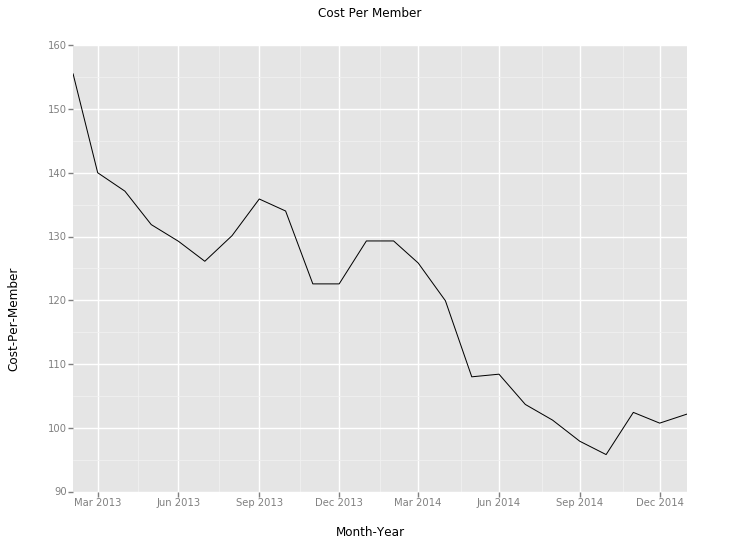

<ggplot: (22017144)>

In [142]:
##############################################################
# Let's visualize


# Cost Per Member
rev_cpm = ggplot(aes(x='Month-Year', y = 'Cost-Per-Member'), data = full_u_r)
rev_cpm = rev_cpm + geom_line() + ggtitle("Cost Per Member")
rev_cpm



Over time it appears the Cost Per User is falling due to increased involvement at all levels of the Media Kit. A greater variety of packages to choose from as well as website success has decreased costs for the average user and increased participation.

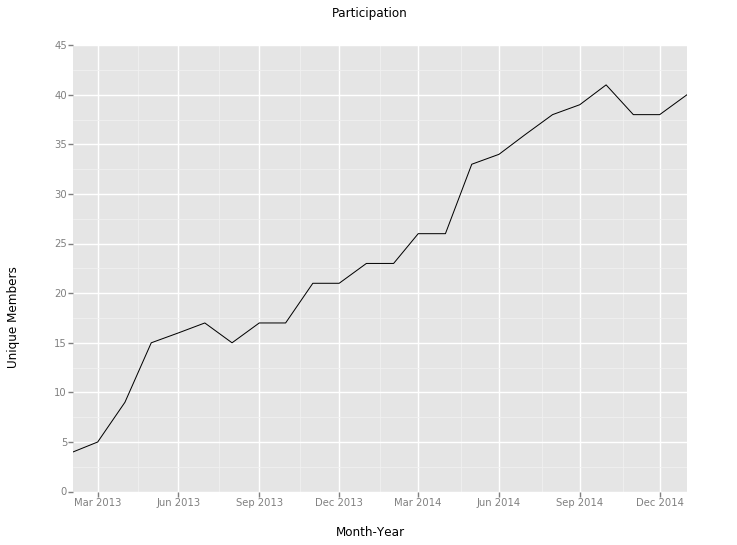

<ggplot: (22046927)>

In [143]:
# Unique Members
rev_um = ggplot(aes(x='Month-Year', y = 'Unique Members'), data = full_u_r)
rev_um = rev_um + geom_line() + ggtitle("Participation")
rev_um

The steady increase in participation is an indication from the market for the value of the exposure and demand for those impressions.

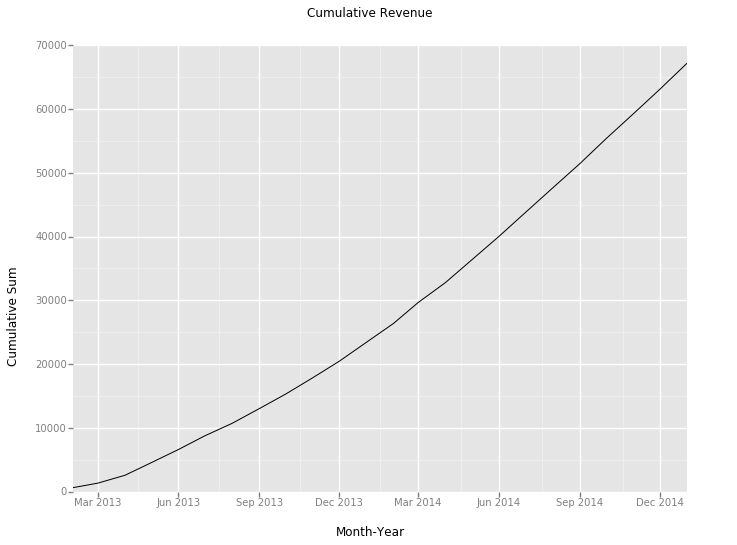

<ggplot: (22300406)>

In [144]:


# Cumulative Revenue from Operations
rev_cumsum = ggplot(aes(x='Month-Year', y = 'Cumulative Sum'), data = revenue)
rev_cumsum = rev_cumsum + geom_line() + ggtitle("Cumulative Revenue")
rev_cumsum

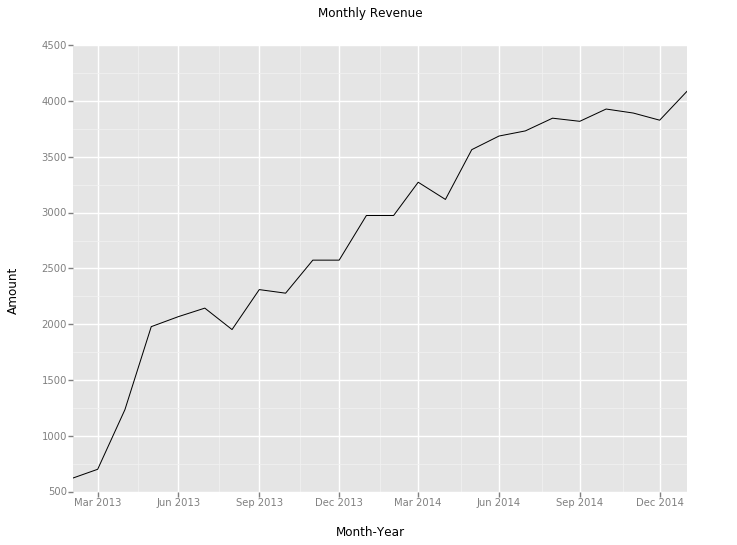

<ggplot: (23231597)>

In [145]:
# Revenue over time
rev_ot = ggplot(aes(x = 'Month-Year', y = 'Amount'), data = revenue) 
rev_ot = rev_ot + geom_line() + ggtitle("Monthly Revenue")
rev_ot